/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.9251 - loss: 0.2488
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9883 - loss: 0.0375
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9920 - loss: 0.0253
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9949 - loss: 0.0166
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9961 - loss: 0.0118


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       495,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,545,440 (5.90 MB)

 Trainable params: 515,146 (1.97 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,030,294 (3.93 MB)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9972 - loss: 0.0087 - val_accuracy: 0.9887 - val_loss: 0.0392
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9981 - loss: 0.0060 - val_accuracy: 0.9883 - val_loss: 0.0418
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 37ms/step - accuracy: 0.9980 - loss: 0.0058 - val_accuracy: 0.9885 - val_loss: 0.0428
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9988 - loss: 0.0040 - val_accuracy: 0.9907 - val_loss: 0.0351
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9987 - loss: 0.0039 - val_accuracy: 0.9889 - val_loss: 0.0468


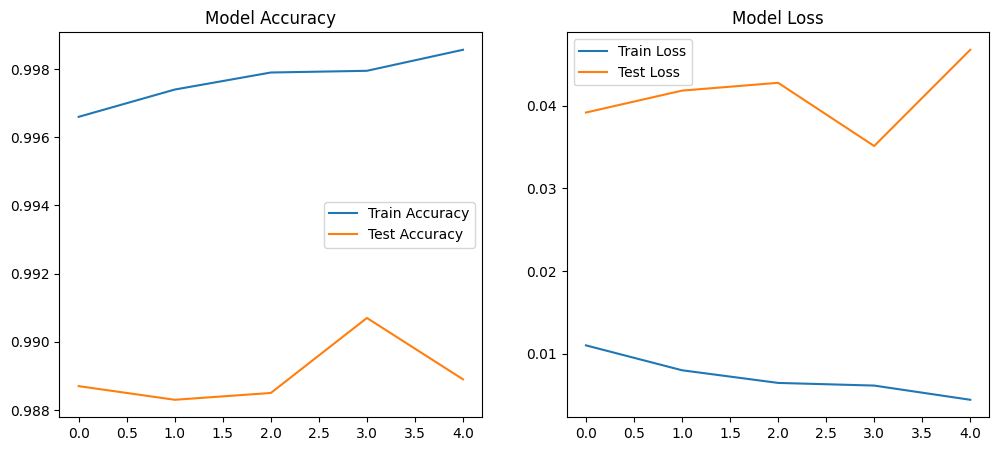

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


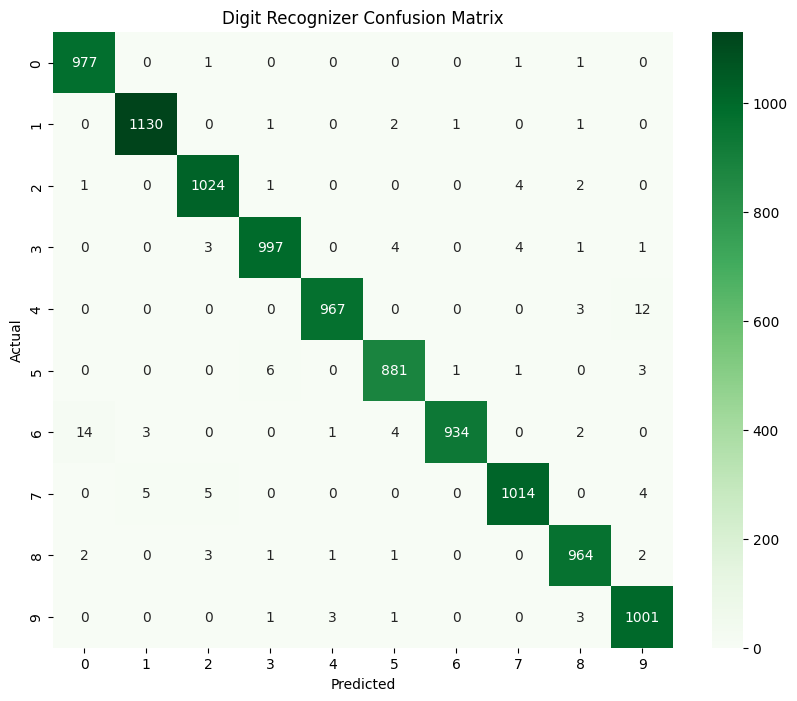

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
I think the digit is: 3


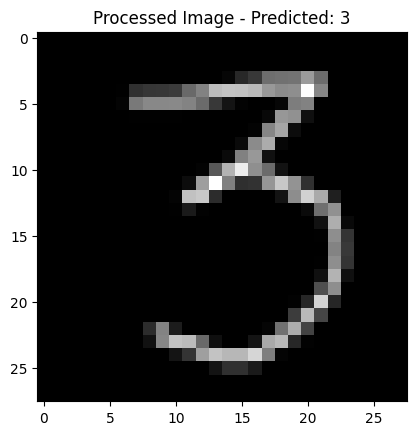

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# 1. Load and Reshape data for CNN (Adding 1 channel for grayscale)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((60000, 28, 28, 1)) / 255.0
x_test = x_test.reshape((10000, 28, 28, 1)) / 255.0

# 2. Build a Professional CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # Feature detection
    layers.MaxPooling2D((2, 2)), # Reduce size
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 3. Compile with Adam Optimizer
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Training
model.fit(x_train, y_train, epochs=5)

# 5. Model Summary
model.summary()



import seaborn as sns
import numpy as np

from sklearn.metrics import confusion_matrix

# --- A. Accuracy/Loss Graphs ---
# Note: history object contains training data
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

plt.figure(figsize=(12, 5))
# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# --- B. Confusion Matrix for Digits ---
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(i) for i in y_pred] # Get digit from probabilities

cm_digit = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_digit, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Digit Recognizer Confusion Matrix')
plt.show()



import numpy as np
import cv2

# 'demo1.png'
img = cv2.imread('demo1.png', cv2.IMREAD_GRAYSCALE)

img_inverted = cv2.bitwise_not(img)

img_resized = cv2.resize(img_inverted, (28, 28))
img_final = img_resized / 255.0
img_input = img_final.reshape(1, 28, 28, 1)

prediction = model.predict(img_input)
predicted_digit = np.argmax(prediction)

print(f"I think the digit is: {predicted_digit}")

plt.imshow(img_final, cmap= 'gray')
plt.title(f"Processed Image - Predicted: {predicted_digit}")
plt.show()
